<a href="https://colab.research.google.com/github/mbhuiyan1/Statistical-Data-Mining-in-Python/blob/main/Principal_component_analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
##########################################################
##                   1. Kernel PCA                      ##
##########################################################
#---------------   Part (a)   ----------------------------
# Reading the train and test data:
trainData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/untitled folder/PROJECT_2/optdigits.tra', header=None)
testData = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/untitled folder/PROJECT_2/optdigits.tes', header=None)



In [6]:
# Remove unary columns in test and train datasets:
toDrop = []
for i in trainData.keys()[0:-1]:
    if sum(trainData.loc[:,i] == trainData.loc[0,i]) == trainData.shape[0]:
        toDrop.append(i)
for i in testData.keys()[0:-1]:
    if sum(testData.loc[:,i] == testData.loc[0,i]) == testData.shape[0]:
        toDrop.append(i)
trainData = trainData.drop(toDrop,axis=1)
testData = testData.drop(toDrop,axis=1)

# Check percentage of missing data on each column for training data:
missing = trainData.isnull()   
missPercent1 = 100*missing.sum()/len(missing.index)
print('\nPercentage of missing data:')
print(missPercent1)

# Check percentage of missing data on each column for test data:
missing = testData.isnull()   
missPercent2 = 100*missing.sum()/len(missing.index)
print('\nPercentage of missing data:')
print(missPercent2)



Percentage of missing data:
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
     ... 
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
Length: 62, dtype: float64

Percentage of missing data:
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
     ... 
60    0.0
61    0.0
62    0.0
63    0.0
64    0.0
Length: 62, dtype: float64


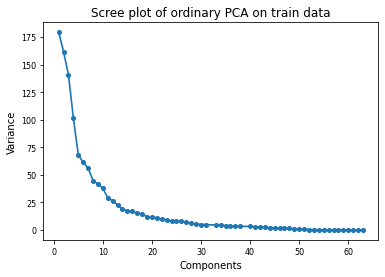

In [7]:
#---------------   Part (b)   ----------------------------
# Separating the features from the target variables in the training dataset:
X_train = trainData.drop(trainData.keys()[-1],axis=1)
y_train = trainData.loc[:,trainData.keys()[-1]]

# Perform ordinary PCA analysis:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

# Get scree plot of the variances:
eigVal = pca.explained_variance_
plt.figure()
plt.plot(X_train.keys(),eigVal, marker='o', linewidth=1.7, markersize=4)
plt.xlabel("Components",size=10)
plt.ylabel("Variance",size=10)
plt.title('Scree plot of ordinary PCA on train data',fontsize=12)
plt.tick_params(axis='both',labelsize=8)
plt.savefig('pcaTrainScree.eps', format='eps', orientation='portrait', dpi=1024)


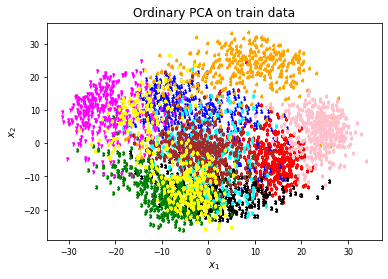

In [8]:
# Scatter plot of the digits:
plt.figure()
plt.title("Ordinary PCA on train data",fontsize=12)
dig0 = y_train == 0;  X0 = X_pca[dig0.values][:,[0,1]]
dig1 = y_train == 1;  X1 = X_pca[dig1.values][:,[0,1]]
dig2 = y_train == 2;  X2 = X_pca[dig2.values][:,[0,1]]
dig3 = y_train == 3;  X3 = X_pca[dig3.values][:,[0,1]]
dig4 = y_train == 4;  X4 = X_pca[dig4.values][:,[0,1]]
dig5 = y_train == 5;  X5 = X_pca[dig5.values][:,[0,1]]
dig6 = y_train == 6;  X6 = X_pca[dig6.values][:,[0,1]]
dig7 = y_train == 7;  X7 = X_pca[dig7.values][:,[0,1]]
dig8 = y_train == 8;  X8 = X_pca[dig8.values][:,[0,1]]
dig9 = y_train == 9;  X9 = X_pca[dig9.values][:,[0,1]]

mSz=10
plt.scatter(X0[:,0], X0[:,1], c="red", s=mSz, edgecolor='red', marker='$0$')
plt.scatter(X1[:,0], X1[:,1], c="blue", s=mSz, edgecolor='blue', marker='$1$')
plt.scatter(X2[:,0], X2[:,1], c="black", s=mSz, edgecolor='black', marker='$2$')
plt.scatter(X3[:,0], X3[:,1], c="green", s=mSz, edgecolor='green', marker='$3$')
plt.scatter(X4[:,0], X4[:,1], c="orange", s=mSz, edgecolor='orange', marker='$4$')
plt.scatter(X5[:,0], X5[:,1], c="cyan", s=mSz, edgecolor='cyan', marker='$5$')
plt.scatter(X6[:,0], X6[:,1], c="pink", s=mSz, edgecolor='pink', marker='$6$')
plt.scatter(X7[:,0], X7[:,1], c="magenta", s=mSz, edgecolor='magenta', marker='$7$')
plt.scatter(X8[:,0], X8[:,1], c="brown", s=mSz, edgecolor='brown', marker='$8$')
plt.scatter(X9[:,0], X9[:,1], c="yellow", s=mSz, edgecolor='yellow', marker='$9$')
plt.xlabel("$x_1$",size=10)
plt.ylabel("$x_2$",size=10)
plt.tick_params(axis='both',labelsize=8)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `lambdas_` was deprecated in version 1.0 and will be removed in 1.2. Use `eigenvalues_` instead.
  warnings.warn(msg, category=FutureWarning)


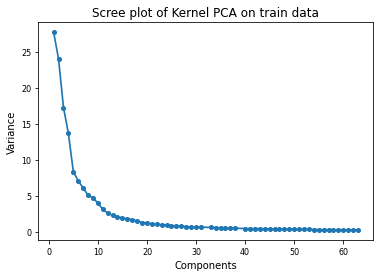

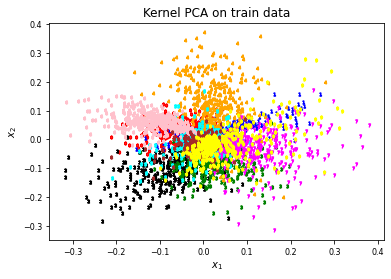

In [9]:
#---------------   Part (c)   ----------------------------
# Perform kernel PCA analysis:
# Option 1 - polynomial kernel:
#kPca = KernelPCA(n_components=len(X_train.keys()), kernel='poly', gamma=1/1000, degree=3, coef0=0)
# Option 2 - rbf kernel:
#kPca = KernelPCA(n_components=len(X_train.keys()), kernel='rbf', gamma=1/900)
# Option 3 - sigmoid kernel:
kPca = KernelPCA(n_components=len(X_train.keys()), kernel='sigmoid', gamma=1/1000, coef0=0)
kPca.fit(X_train)
X_kPca = kPca.transform(X_train)

# Get scree plot of the variances:
kEigVal = kPca.lambdas_
plt.figure()
plt.plot(X_train.keys(),kEigVal, marker='o', linewidth=1.7, markersize=4)
plt.xlabel("Components",size=10)
plt.ylabel("Variance",size=10)
plt.title('Scree plot of Kernel PCA on train data',fontsize=12)
plt.tick_params(axis='both',labelsize=8)
plt.savefig('kpcaTrainScree.eps', format='eps', orientation='portrait', dpi=1024)

# Scatter plot of the digits:
plt.figure()
plt.title("Kernel PCA on train data",fontsize=12)
dig0 = y_train == 0;  X0 = X_kPca[dig0.values][:,[0,1]]
dig1 = y_train == 1;  X1 = X_kPca[dig1.values][:,[0,1]]
dig2 = y_train == 2;  X2 = X_kPca[dig2.values][:,[0,1]]
dig3 = y_train == 3;  X3 = X_kPca[dig3.values][:,[0,1]]
dig4 = y_train == 4;  X4 = X_kPca[dig4.values][:,[0,1]]
dig5 = y_train == 5;  X5 = X_kPca[dig5.values][:,[0,1]]
dig6 = y_train == 6;  X6 = X_kPca[dig6.values][:,[0,1]]
dig7 = y_train == 7;  X7 = X_kPca[dig7.values][:,[0,1]]
dig8 = y_train == 8;  X8 = X_kPca[dig8.values][:,[0,1]]
dig9 = y_train == 9;  X9 = X_kPca[dig9.values][:,[0,1]]

plt.scatter(X0[:,0], X0[:,1], c="red", s=mSz, edgecolor='red', marker='$0$')
plt.scatter(X1[:,0], X1[:,1], c="blue", s=mSz, edgecolor='blue', marker='$1$')
plt.scatter(X2[:,0], X2[:,1], c="black", s=mSz, edgecolor='black', marker='$2$')
plt.scatter(X3[:,0], X3[:,1], c="green", s=mSz, edgecolor='green', marker='$3$')
plt.scatter(X4[:,0], X4[:,1], c="orange", s=mSz, edgecolor='orange', marker='$4$')
plt.scatter(X5[:,0], X5[:,1], c="cyan", s=mSz, edgecolor='cyan', marker='$5$')
plt.scatter(X6[:,0], X6[:,1], c="pink", s=mSz, edgecolor='pink', marker='$6$')
plt.scatter(X7[:,0], X7[:,1], c="magenta", s=mSz, edgecolor='magenta', marker='$7$')
plt.scatter(X8[:,0], X8[:,1], c="brown", s=mSz, edgecolor='brown', marker='$8$')
plt.scatter(X9[:,0], X9[:,1], c="yellow", s=mSz, edgecolor='yellow', marker='$9$')
plt.xlabel("$x_1$",size=10)
plt.ylabel("$x_2$",size=10)
plt.tick_params(axis='both',labelsize=8)

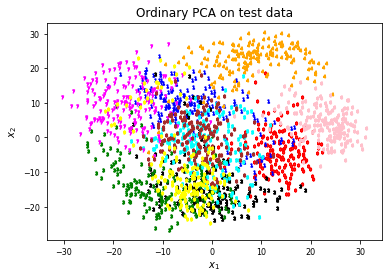

In [10]:
#---------------   Part (d)   ----------------------------
# Separating the features from the target variables in the test dataset:
X_test = testData.drop(testData.keys()[-1],axis=1)
y_test = testData.loc[:,testData.keys()[-1]]

# Perform ordinary PCA analysis:
X_pca = pca.transform(X_test)

# Scatter plot of the digits:
plt.figure()
plt.title("Ordinary PCA on test data",fontsize=12)
dig0 = y_test == 0;  X0 = X_pca[dig0.values][:,[0,1]]
dig1 = y_test == 1;  X1 = X_pca[dig1.values][:,[0,1]]
dig2 = y_test == 2;  X2 = X_pca[dig2.values][:,[0,1]]
dig3 = y_test == 3;  X3 = X_pca[dig3.values][:,[0,1]]
dig4 = y_test == 4;  X4 = X_pca[dig4.values][:,[0,1]]
dig5 = y_test == 5;  X5 = X_pca[dig5.values][:,[0,1]]
dig6 = y_test == 6;  X6 = X_pca[dig6.values][:,[0,1]]
dig7 = y_test == 7;  X7 = X_pca[dig7.values][:,[0,1]]
dig8 = y_test == 8;  X8 = X_pca[dig8.values][:,[0,1]]
dig9 = y_test == 9;  X9 = X_pca[dig9.values][:,[0,1]]

plt.scatter(X0[:,0], X0[:,1], c="red", s=mSz, edgecolor='red', marker='$0$')
plt.scatter(X1[:,0], X1[:,1], c="blue", s=mSz, edgecolor='blue', marker='$1$')
plt.scatter(X2[:,0], X2[:,1], c="black", s=mSz, edgecolor='black', marker='$2$')
plt.scatter(X3[:,0], X3[:,1], c="green", s=mSz, edgecolor='green', marker='$3$')
plt.scatter(X4[:,0], X4[:,1], c="orange", s=mSz, edgecolor='orange', marker='$4$')
plt.scatter(X5[:,0], X5[:,1], c="cyan", s=mSz, edgecolor='cyan', marker='$5$')
plt.scatter(X6[:,0], X6[:,1], c="pink", s=mSz, edgecolor='pink', marker='$6$')
plt.scatter(X7[:,0], X7[:,1], c="magenta", s=mSz, edgecolor='magenta', marker='$7$')
plt.scatter(X8[:,0], X8[:,1], c="brown", s=mSz, edgecolor='brown', marker='$8$')
plt.scatter(X9[:,0], X9[:,1], c="yellow", s=mSz, edgecolor='yellow', marker='$9$')
plt.xlabel("$x_1$",size=10)
plt.ylabel("$x_2$",size=10)
plt.tick_params(axis='both',labelsize=8)


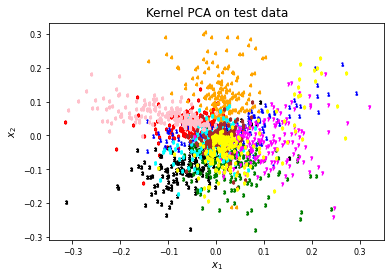

In [11]:
# Perform kernel PCA analysis:
X_kPca = kPca.transform(X_test)

# Scatter plot of the digits:
plt.figure()
plt.title("Kernel PCA on test data")
dig0 = y_test == 0;  X0 = X_kPca[dig0.values][:,[0,1]]
dig1 = y_test == 1;  X1 = X_kPca[dig1.values][:,[0,1]]
dig2 = y_test == 2;  X2 = X_kPca[dig2.values][:,[0,1]]
dig3 = y_test == 3;  X3 = X_kPca[dig3.values][:,[0,1]]
dig4 = y_test == 4;  X4 = X_kPca[dig4.values][:,[0,1]]
dig5 = y_test == 5;  X5 = X_kPca[dig5.values][:,[0,1]]
dig6 = y_test == 6;  X6 = X_kPca[dig6.values][:,[0,1]]
dig7 = y_test == 7;  X7 = X_kPca[dig7.values][:,[0,1]]
dig8 = y_test == 8;  X8 = X_kPca[dig8.values][:,[0,1]]
dig9 = y_test == 9;  X9 = X_kPca[dig9.values][:,[0,1]]

plt.scatter(X0[:,0], X0[:,1], c="red", s=mSz, edgecolor='red', marker='$0$')
plt.scatter(X1[:,0], X1[:,1], c="blue", s=mSz, edgecolor='blue', marker='$1$')
plt.scatter(X2[:,0], X2[:,1], c="black", s=mSz, edgecolor='black', marker='$2$')
plt.scatter(X3[:,0], X3[:,1], c="green", s=mSz, edgecolor='green', marker='$3$')
plt.scatter(X4[:,0], X4[:,1], c="orange", s=mSz, edgecolor='orange', marker='$4$')
plt.scatter(X5[:,0], X5[:,1], c="cyan", s=mSz, edgecolor='cyan', marker='$5$')
plt.scatter(X6[:,0], X6[:,1], c="pink", s=mSz, edgecolor='pink', marker='$6$')
plt.scatter(X7[:,0], X7[:,1], c="magenta", s=mSz, edgecolor='magenta', marker='$7$')
plt.scatter(X8[:,0], X8[:,1], c="brown", s=mSz, edgecolor='brown', marker='$8$')
plt.scatter(X9[:,0], X9[:,1], c="yellow", s=mSz, edgecolor='yellow', marker='$9$')
plt.xlabel("$x_1$",size=10)
plt.ylabel("$x_2$",size=10)
plt.tick_params(axis='both',labelsize=8)